In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
#from xgboost import XGBRegressor
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split




train = pd.read_csv('/Users/calvin/python/car project/testing_v1.csv')
test = pd.read_csv('/Users/calvin/python/car project/testing_v1.csv')

train=train[:800]
test=test.drop(test[:800].index,axis=0)



In [81]:
# train_x.dropna(axis=0, how='any')

train_y= train["Price"]
train_x= train.drop(["Price"],axis=1)
# test_y= test["Price"]
# test_x= test.drop(["Price"],axis=1)

train_x=pd.get_dummies(train_x)
# train_x=pd.get_dummies(test_x)


# print(type(train))
# print(train.shape)
# print(train)

In [82]:



# # print(test)
# test_y=test['event count']
# test_x=test.drop(columns=["event count"])
# test_y.reset_index(drop=True, inplace=True)
# test_x.reset_index(drop=True, inplace=True)
# test_y=np.array(test_y)
# print(type(test_x))
# print(type(test_y))

# train=train.drop(train[train["Year"]==2017].index)
# train_y=train['event count']
# train_x=train.drop(columns=["event count"])

train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.3)

train_x=train_x.values
train_y=train_y.values
train_y=train_y.reshape(-1,1)
test_x=test_x.values
test_y=test_y.values
test_y=test_y.reshape(-1,1)


test_y=test_y.astype(np.int)
train_y=train_y.astype(np.int)
print(train_y)
# test_x, test_y -> testing set
# train_x -> training set & validation set feature
# train_y -> label of training and validation set

[[30991]
 [16987]
 [14995]
 [ 9995]
 [29288]
 [12750]
 [19990]
 [23700]
 [20800]
 [16995]
 [13997]
 [32000]
 [10995]
 [16795]
 [12980]
 [15489]
 [22990]
 [24499]
 [10899]
 [38988]
 [ 9875]
 [ 9950]
 [14995]
 [29995]
 [10995]
 [11995]
 [13995]
 [11990]
 [14477]
 [13999]
 [14995]
 [10695]
 [67488]
 [18900]
 [10999]
 [27916]
 [10276]
 [13888]
 [13500]
 [ 7999]
 [37998]
 [15995]
 [14194]
 [31995]
 [11995]
 [15911]
 [19346]
 [13500]
 [10995]
 [16493]
 [31900]
 [39994]
 [28990]
 [15980]
 [13790]
 [31000]
 [13372]
 [21999]
 [18492]
 [21499]
 [31800]
 [20995]
 [16995]
 [15995]
 [14682]
 [37991]
 [11993]
 [12825]
 [11950]
 [43990]
 [11900]
 [12995]
 [11995]
 [10995]
 [31995]
 [35991]
 [11989]
 [20900]
 [14960]
 [24995]
 [20999]
 [16900]
 [ 8150]
 [19900]
 [16360]
 [15995]
 [13000]
 [ 8999]
 [13877]
 [10794]
 [14477]
 [12995]
 [12981]
 [14000]
 [ 9994]
 [34910]
 [10575]
 [ 9995]
 [24995]
 [11990]
 [13995]
 [15490]
 [22765]
 [27995]
 [14252]
 [17999]
 [14777]
 [14990]
 [13995]
 [18998]
 [11827]
 

In [84]:


# 標準化
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x=scaler.transform(test_x)


#PCA---------------------------------------------------------------------------
pca_num=0
delta=0.1
pca=PCA(n_components = 0.999999)
train_x=pca.fit_transform(train_x)
test_x=pca.transform(test_x)
print(train_y.shape)
dimension=train_x.shape[1]
print(train_x)
print("train_x.shape=", train_x.shape)
print(test_y)
print(test_x.shape)

(664, 1)
[[-9.52553192e-01 -3.65931938e+00  4.26808300e+00 ... -1.32145138e-16
   9.27838433e-17 -6.69618851e-17]
 [ 9.44056712e-01  1.34728624e+00  1.10198697e+00 ...  3.34224271e-01
   2.15539618e-01 -2.70531194e-01]
 [ 2.55373995e+00 -3.17013113e-01 -1.02115967e+00 ... -9.69418827e-01
  -4.40575071e-01 -7.42923468e-01]
 ...
 [-1.63405836e+00 -1.54868591e+00  7.32476517e-01 ...  2.64067896e+00
  -1.35682679e+00  1.91981971e+00]
 [ 3.16885483e+00 -1.06220776e+00 -3.84990467e-01 ... -2.27063429e-01
  -5.89382947e-01 -1.71514539e+00]
 [-3.21457007e+00 -3.66178398e-01 -1.82236965e+00 ...  3.93662679e-15
   3.89189239e-15  3.24324366e-15]]
train_x.shape= (664, 663)
[[17995]
 [29750]
 [26997]
 [28975]
 [19980]
 [10990]
 [11850]
 [14498]
 [13297]
 [21999]
 [43987]
 [12540]
 [15990]
 [ 8900]
 [16727]
 [10495]
 [ 7995]
 [74950]
 [17999]
 [34888]
 [22995]
 [23995]
 [26995]
 [13500]
 [ 9950]
 [13879]
 [ 5900]
 [11998]
 [15950]
 [17995]
 [29995]
 [16975]
 [66995]
 [16850]
 [12850]
 [32790]
 [154

In [85]:
train_y=train_y.values
train_y=train_y.reshape(-1,1)  

AttributeError: 'numpy.ndarray' object has no attribute 'values'

1.0
[[ 4.18256043e+02 -2.23676590e+03  5.19094680e+02 -5.54889535e+02
   2.61883432e+02 -5.14140990e+01  2.40954159e+02  1.89961233e+02
  -1.06586448e+01 -2.13660096e+02 -1.79646111e+02  3.97805995e+01
  -7.63679953e+01 -8.54581389e+01 -4.58699042e+01  3.01759213e+01
  -4.35002074e+01 -4.76329433e+01 -4.40331336e+01  9.84626487e+01
   2.11789204e+01  2.70310244e+01 -3.24043083e+01  9.93848008e+01
  -1.71990012e+02  4.60738194e+01  6.77240769e+01 -2.18737334e+01
   6.76715630e+00 -2.14232953e+01 -8.00144070e+01 -9.83938736e+01
  -1.15585895e+01 -7.61580160e+01 -1.27266960e+02 -1.95439434e+01
  -6.78024591e+01 -1.21307344e+02 -1.96089878e+02 -1.72124956e+02
  -5.15457901e+01 -6.94133457e+01  1.20074027e+02  2.85086963e+02
  -2.88373678e+02 -7.74055940e+00  7.68078590e+02 -8.70623579e+02
   9.04674582e+02  4.76186808e+02  3.90933166e+01 -1.89115409e+02
   3.50233215e+00 -6.08305188e+02 -3.40873395e+01  1.44740615e+00
   4.92728688e+02  1.70332800e+02 -3.83034566e+01  1.02435061e+02
  -1.0

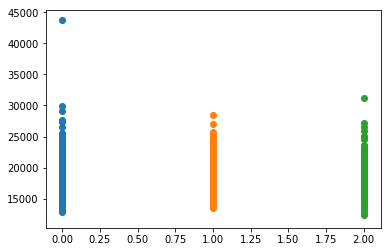

<Figure size 432x288 with 0 Axes>

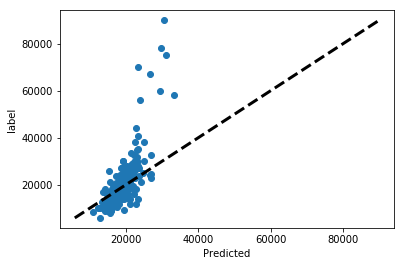

1.0
[[ 4.18256043e+02 -2.23676590e+03  5.19094680e+02 -5.54889535e+02
   2.61883432e+02 -5.14140990e+01  2.40954159e+02  1.89961233e+02
  -1.06586448e+01 -2.13660096e+02 -1.79646111e+02  3.97805995e+01
  -7.63679953e+01 -8.54581389e+01 -4.58699042e+01  3.01759213e+01
  -4.35002074e+01 -4.76329433e+01 -4.40331336e+01  9.84626487e+01
   2.11789204e+01  2.70310244e+01 -3.24043083e+01  9.93848008e+01
  -1.71990012e+02  4.60738194e+01  6.77240769e+01 -2.18737334e+01
   6.76715630e+00 -2.14232953e+01 -8.00144070e+01 -9.83938736e+01
  -1.15585895e+01 -7.61580160e+01 -1.27266960e+02 -1.95439434e+01
  -6.78024591e+01 -1.21307344e+02 -1.96089878e+02 -1.72124956e+02
  -5.15457901e+01 -6.94133457e+01  1.20074027e+02  2.85086963e+02
  -2.88373678e+02 -7.74055940e+00  7.68078590e+02 -8.70623579e+02
   9.04674582e+02  4.76186808e+02  3.90933166e+01 -1.89115409e+02
   3.50233215e+00 -6.08305188e+02 -3.40873395e+01  1.44740615e+00
   4.92728688e+02  1.70332800e+02 -3.83034566e+01  1.02435061e+02
  -1.0

In [86]:
from sklearn import linear_model
K=3
kf = KFold(n_splits=K)
LR = linear_model.LinearRegression()
i=0
rmse=0
for train_index, test_index in kf.split(train_x):
    LR.fit(train_x[train_index],train_y[train_index])
    y_LR = LR.predict (train_x[test_index])

    plt.scatter(np.ones(y_LR.shape)*i,y_LR)
    i=i+1
    mse=np.mean((np.round(y_LR) != train_y[test_index])**2)
    rmse+=np.sqrt(mse)/K
print(rmse)
print(LR.coef_)
print(LR.intercept_) 




y_LR_test = LR.predict (test_x)
print("y_LR_test =",y_LR_test)
# y_LR_test=np.mean(y_LR_test)
print("finish, plot the scatter figure")
plt.figure(3)
fig, ax = plt.subplots()
ax.scatter(y_LR_test, test_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('label')
# plt.xlim((0,10))
# plt.ylim((0,10))

plt.show()   
plt.pause(0.1)
    
print(rmse)
print(LR.coef_)
print(LR.intercept_) 

1.0
[[ 5.76733032e+02 -2.04718807e+03  1.06389125e+03 -3.78282256e+02
   2.68608417e+02 -5.57421706e+01  2.22505275e+02  4.27570074e+02
   5.07249646e+00 -4.45346118e+02 -3.54906448e+02  1.40982285e+02
  -1.60442433e+02 -3.58091759e+02 -2.12165699e+02 -2.35404580e+02
  -5.66898692e+01 -1.35757990e+02 -4.07838687e+02 -3.42528417e+01
  -5.63032552e+02  1.65019610e+02 -2.57156500e+02  8.14085972e+01
  -4.06851220e+02 -3.66277573e+02 -1.88460574e+02 -1.45341003e+02
  -4.66270391e+02 -3.10050845e+02 -1.16447947e+02 -1.27683355e+02
   3.76095423e+02  2.32042082e+02  7.97418361e+01 -6.57481244e+01
  -2.96850738e+02  4.50917673e+01 -3.97608208e+02 -2.31075365e+02
  -2.95969648e+01 -2.56771529e+02  2.56902795e+02  3.20584861e+02
  -4.10030287e+02 -5.04332425e+01  9.12486574e+02 -9.85668299e+02
   1.08216443e+03  5.43689704e+02  3.92170010e+02 -1.35939773e+02
  -1.80479997e+02 -8.73496334e+02 -8.88884917e+01  1.17912443e+02
   3.94961347e+02  7.36718543e+01  9.08771170e+01  1.31711883e+02
  -1.0

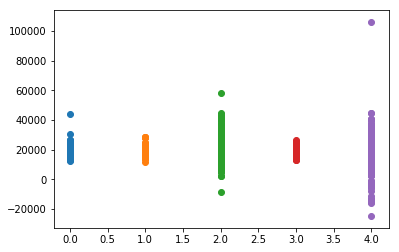

In [87]:
#Linear Regression
from sklearn import linear_model
K=5
kf = KFold(n_splits=K)
LR = linear_model.LinearRegression()
i=0
rmse=0

for train_index, test_index in kf.split(train_x):
    LR.fit(train_x[train_index],train_y[train_index])
    y_LR = LR.predict (train_x[test_index])

    plt.scatter(np.ones(y_LR.shape)*i,y_LR)
    i=i+1
    mse=np.mean((np.round(y_LR) != train_y[test_index])**2)
    rmse+=np.sqrt(mse)/K
print(rmse)
print(LR.coef_)
print(LR.intercept_) 

y_LR_test = [[17035.28395418]
 [22901.49839527]
 [23018.57633453]
 [21635.10039791]
 [19365.40659834]
 [13610.76166802]
 [17021.26093577]
 [20617.22997194]
 [16454.03398502]
 [18494.11995912]
 [22339.99308593]
 [16822.82025577]
 [16767.06148907]
 [20864.01157717]
 [11730.78596894]
 [17635.44923527]
 [16052.45358741]
 [32289.17786275]
 [20362.14601677]
 [23262.69684959]
 [18950.46752213]
 [22204.95556864]
 [16469.11821563]
 [16062.81598353]
 [12174.91603973]
 [20911.70916247]
 [11738.28305474]
 [15267.83707831]
 [20578.62437016]
 [16414.25037082]
 [17644.21889871]
 [17192.9772732 ]
 [26120.65060478]
 [21710.8127582 ]
 [12736.16149956]
 [25982.94911845]
 [15724.4318859 ]
 [23708.59234354]
 [20656.19658177]
 [15291.00475941]
 [18350.91351931]
 [23297.43676169]
 [34879.63440097]
 [20270.62625369]
 [22195.03083253]
 [12527.99882417]
 [15777.78594242]
 [16118.01281606]
 [15879.1505216 ]
 [23915.05731106]
 [17099.49497869]
 [19667.6712239 ]
 [14155.19646754]
 [19576.34804244]
 [23428.92848732

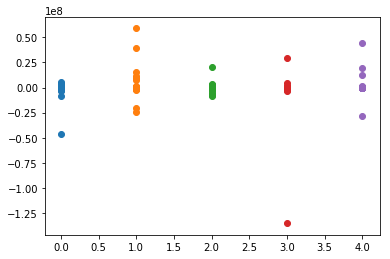

<Figure size 432x288 with 0 Axes>

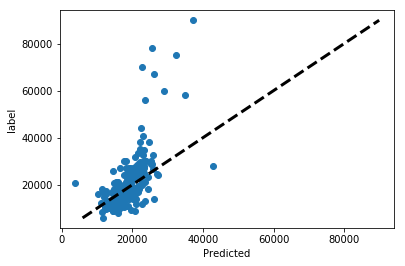

[[-0.00151321 -0.04556232 -0.00977451 ...  0.01858071 -0.18410449
   0.29610947]]
[24856.30384997]
1.0
1000.0


In [88]:
#kernel Ridge
degree=6
i=0
train_x_copy=train_x
for power in range(2,degree+1):
    i=i+1
    train_x=np.concatenate((train_x, np.power(train_x_copy,power)),axis=1) 

#kernelridge
from sklearn.linear_model import RidgeCV
K=5
kf = KFold(n_splits=K)
RR = RidgeCV(alphas=np.logspace(-3, 3, 100))
i=0
rmse=0
for train_index, test_index in kf.split(train_x):
    RR.fit(train_x[train_index],train_y[train_index])
    y_RR = RR.predict(train_x[test_index])

    plt.scatter(np.ones(y_RR.shape)*i,y_RR)
    i=i+1
    mse=np.mean((np.round(y_RR) != train_y[test_index])**2)
    rmse+=np.sqrt(mse)/K
    
y_RR = LR.predict (test_x)
print("y_LR_test =",y_RR)
# y_LR_test=np.mean(y_LR_test)
print("finish, plot the scatter figure")
plt.figure(3)
fig, ax = plt.subplots()
ax.scatter(y_RR, test_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('label')
# plt.xlim((0,10))
# plt.ylim((0,10))

plt.show()   
plt.pause(0.1)
print(RR.coef_)
print(RR.intercept_)
print(rmse)
print(RR.alpha_)

In [57]:
# #kernel
# degree=3
# i=0
# train_x_copy=train_x
# for power in range(2,degree+1):
#     i=i+1
#     train_x=np.concatenate((train_x, np.power(train_x_copy,power)),axis=1) 

# #kernelridge
# from sklearn.linear_model import RidgeCV
# K=5
# kf = KFold(n_splits=K)
# RR = RidgeCV(alphas=np.logspace(-3, 3, 100))
# i=0
# rmse=0
# for train_index, test_index in kf.split(train_x):
#     RR.fit(train_x[train_index],train_y[train_index])
#     y_RR = RR.predict(train_x[test_index])

#     plt.scatter(np.ones(y_RR.shape)*i,y_RR)
#     i=i+1
#     mse=np.mean((np.round(y_RR) != train_y[test_index])**2)
#     rmse+=np.sqrt(mse)/K
# print(RR.coef_)
# print(RR.intercept_)
# print(rmse)
# print(RR.alpha_)

In [58]:
# y_RR = LR.predict (test_x)
# print("y_LR_test =",y_RR)

# print("finish, plot the scatter figure")
# plt.figure(3)
# fig, ax = plt.subplots()
# ax.scatter(y_RR, test_y)
# ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
# ax.set_xlabel('Predicted')
# ax.set_ylabel('label')